# Decision Trees

## Scikit-learn Trees

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

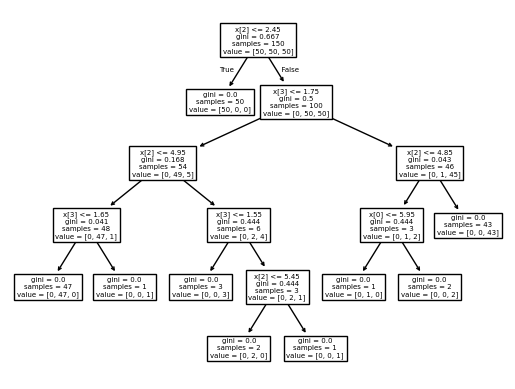

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [8]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('out/dt/iris')

'out\\dt\\iris.pdf'

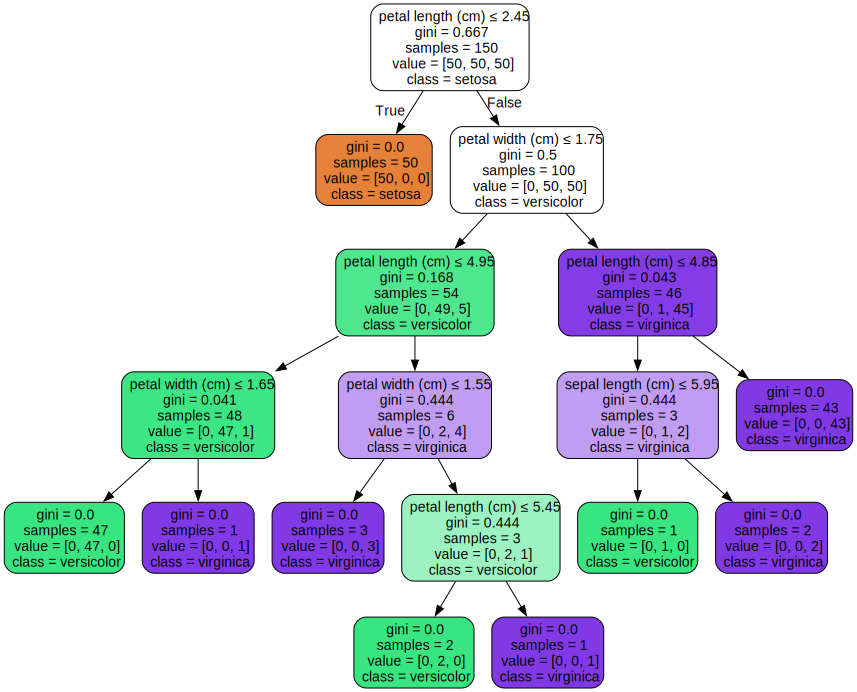

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)
graph

C:\Users\Иван\AppData\Local\Temp\ipykernel_10600\2922905163.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Иван\AppData\Local\Temp\ipykernel_10600\2922905163.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Иван\AppData\Local\Temp\ipykernel_10600\2922905163.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Иван\AppData\Local\Temp\ipykernel_10600\2922905163.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Иван\AppData\Local\Temp\ipykernel_10600\2922905163.py:34: UserWarning: 

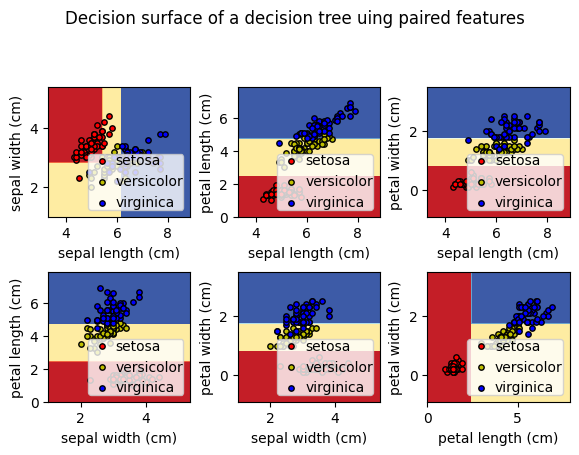

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_classes = 3
plot_colors = 'ryb'
plot_step = .02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = tree.DecisionTreeClassifier(max_depth=2).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.suptitle('Decision surface of a decision tree using paired features')
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

In [15]:
clf.feature_importances_

array([0.56199095, 0.43800905])